In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn import preprocessing
from sklearn.feature_extraction import FeatureHasher
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
#uploading dataset

df = pd.read_csv('/content/drive/MyDrive/encoded_dataset.csv')
df.head()

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,Whitelist,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,Whitelist,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,Whitelist,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,Whitelist,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,Whitelist,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884


In [3]:
labelencoder = LabelEncoder()

df['list'] = labelencoder.fit_transform(df['list'])
df

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,1,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,1,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,1,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,1,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,1,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201544,0,764928,7.885477,932,674,559,340,325,708,748,15,932,246,273,579,457,407,270,335,971
201545,0,710144,7.952831,118,19,422,795,350,389,903,62,62,742,979,836,647,397,706,873,70
201546,0,637200,6.883626,936,277,370,640,39,112,401,890,522,79,607,880,231,693,367,729,260
201547,0,1013904,6.677207,828,241,714,823,365,905,614,1003,98,602,1,897,956,265,73,851,824


In [4]:
X = df[['length', 'entropy', 'sha1_int3', 'sha256_int6', 'sha256_int8']]
y = df['list']
X.shape, y.shape

((201549, 5), (201549,))

In [5]:
X

,length,entropy,sha1_int3,sha256_int6,sha256_int8
0,211456,2.231824,702,152,645
1,17584,6.143784,62,34,750
2,47104,5.694129,228,770,812
3,242816,3.918845,437,575,431
4,119240,6.168794,876,842,884
...,...,...,...,...,...
201544,764928,7.885477,748,270,971
201545,710144,7.952831,903,706,70
201546,637200,6.883626,401,367,260
201547,1013904,6.677207,614,73,824


In [6]:
feature_names = np.array(X.columns)
feature_names

array(['length', 'entropy', 'sha1_int3', 'sha256_int6', 'sha256_int8'],
      dtype=object)

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.24805188, -3.71572179,  0.67816138, -1.20902918,  0.48392332],
       [-0.3639352 , -0.22734377, -1.51640049, -1.61416032,  0.84466922],
       [-0.34629017, -0.62831071, -0.947186  ,  0.91275937,  1.05768108],
       ...,
       [ 0.00642853,  0.43238909, -0.3539685 , -0.4708665 , -0.83881165],
       [ 0.2315962 ,  0.24832087,  0.37640912, -1.48026105,  1.09890919],
       [ 1.2624868 ,  1.11743792, -1.42038841,  1.34879035,  0.21937632]])

In [8]:
df1 = pd.DataFrame(X, columns = feature_names)
df1

,length,entropy,sha1_int3,sha256_int6,sha256_int8
0,-0.248052,-3.715722,0.678161,-1.209029,0.483923
1,-0.363935,-0.227344,-1.516400,-1.614160,0.844669
2,-0.346290,-0.628311,-0.947186,0.912759,1.057681
3,-0.229307,-2.211369,-0.230524,0.243263,-0.251311
4,-0.303172,-0.205042,1.274808,1.159958,1.305050
...,...,...,...,...,...
201544,0.082776,1.325761,0.835896,-0.803898,1.603953
201545,0.050029,1.385822,1.367391,0.693027,-1.491590
201546,0.006429,0.432389,-0.353968,-0.470866,-0.838812
201547,0.231596,0.248321,0.376409,-1.480261,1.098909


In [9]:
cor = df1.corr()
cor

,length,entropy,sha1_int3,sha256_int6,sha256_int8
length,1.000000,0.124923,-0.000099,0.001839,0.001269
entropy,0.124923,1.000000,-0.001629,0.002211,0.005143
sha1_int3,-0.000099,-0.001629,1.000000,-0.002831,0.004266
sha256_int6,0.001839,0.002211,-0.002831,1.000000,0.005845
sha256_int8,0.001269,0.005143,0.004266,0.005845,1.000000


<Axes: >

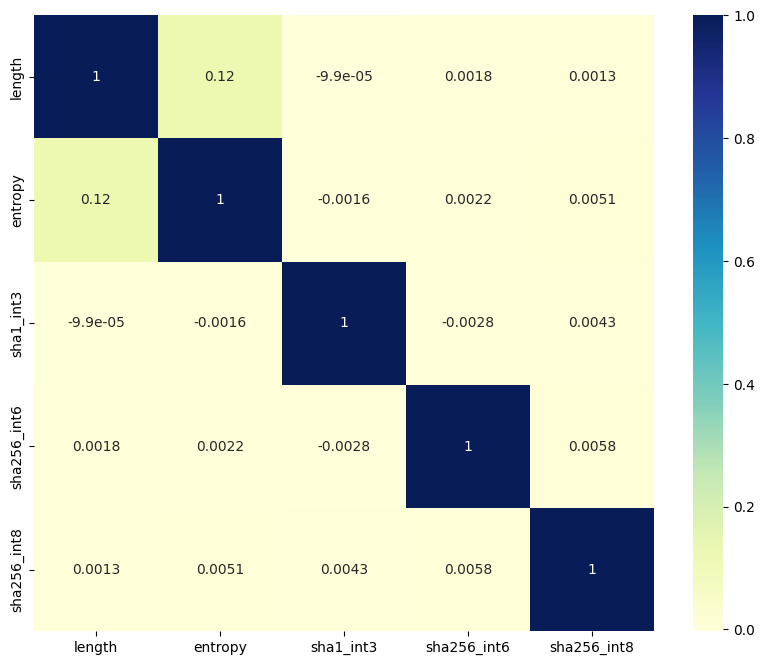

In [10]:
#generation of heat map for the given data

plt.figure(figsize=(10, 8))
sns.heatmap(cor,annot=True,cmap="YlGnBu")

In [11]:
#splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(151161, 5)
(151161,)
(50388, 5)
(50388,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, cohen_kappa_score)
from sklearn.model_selection import cross_val_score

In [13]:
#declaring all the models to be used

models = []

models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)])
models.append(['HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=0)])
models.append(['AdaBoostClassifier', AdaBoostClassifier(random_state=0)])
models.append(['ExtraTrees', ExtraTreesClassifier(random_state=0)])
models.append(['XGBClassifier', XGBClassifier(random_state=0)])
models.append(['LGBMClassifier', LGBMClassifier(random_state=0)])

In [14]:
def print_roc_curve(curve_list):

  # Plot ROC curve
  print()
  plt.figure(figsize=(10,7))
  plt.plot([0, 1], [0, 1], 'k--')

  for name, fpr, tpr, roc_auc in curve_list:
    plt.plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the investigated models')
  plt.legend(loc='best')
  plt.show()

In [15]:
def run_model(X_train, y_train, X_test, y_test, model_lst, kcv):
  lst_1 = []
  roc_auc_list = []

  for m in range(len(model_lst)):
      lst_2 = []
      name = model_lst[m][0]
      model = model_lst[m][1]

      start_time = time.time()  # Start timing

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)

      # for ROC-AUC Curve
      y_pred_prob = model.predict_proba(X_test)[:,-1]
      fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
      roc_auc = auc(fpr, tpr)
      roc_auc_list.append([name, fpr, tpr, roc_auc])

      # for Confusion Matrix
      plt.figure(figsize=(7,5))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title(name)
      plt.xlabel('Predict')
      plt.ylabel('Truth')
      plt.show()

      # k-fold Validation
      accuracies = cross_val_score(estimator= model, X = X_train, y = y_train, cv=kcv)
      acc_score = accuracy_score(y_test,y_pred)
      roc = roc_auc_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      cohen_score = cohen_kappa_score(y_test, y_pred)

      end_time = time.time()  # End timing
      execution_time = end_time - start_time

      print(name,':')
      print(cm)
      print('Accuracy Score: ', acc_score)
      print('')
      print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
      print('')
      print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
      print('')
      print('ROC AUC Score: {:.2f} %'.format(roc))
      print('')
      print('Precision: {:.2f} %'.format(precision))
      print('')
      print('Recall: {:.2f} %'.format(recall))
      print('')
      print('F1 Score: {:.2f} %'.format(f1))
      print('')
      print('Cohen Score: {:.2f} %'.format(cohen_score))
      print('')
      print('Execution Time: {:.2f} seconds'.format(execution_time))  # Print execution time
      print('-'*40)
      print('')

      lst_2.append(name)
      lst_2.append(acc_score*100)
      lst_2.append(accuracies.mean()*100)
      lst_2.append(accuracies.std()*100)
      lst_2.append(roc)
      lst_2.append(precision)
      lst_2.append(recall)
      lst_2.append(f1)
      lst_2.append(cohen_score)
      lst_2.append(execution_time)  # Add execution time to the list
      lst_1.append(lst_2)

  print_roc_curve(roc_auc_list)

  df1 = pd.DataFrame(lst_1,columns=['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std.Deviation', 'ROC_AUC',
                                    'Precision', 'Recall', 'F1 Score', 'Cohen-Kappa Score', 'Execution Time'])
  df1.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy', 'Execution Time'],inplace=True,ascending=False)

  return df1

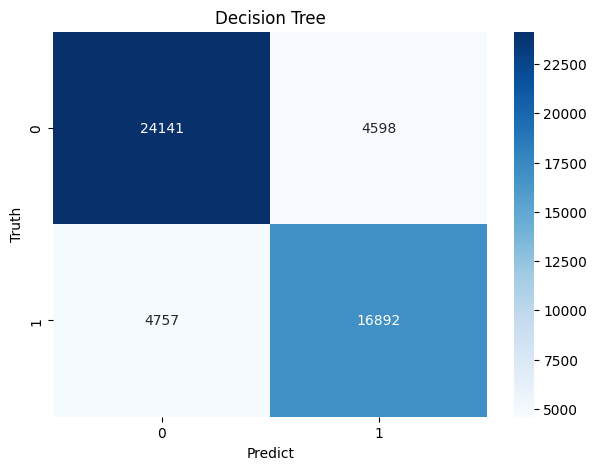

Decision Tree :
[[24141  4598]
 [ 4757 16892]]
Accuracy Score:  0.8143407160435024

K-Fold Validation Mean Accuracy: 81.17 %

Standard Deviation: 0.16 %

ROC AUC Score: 0.81 %

Precision: 0.79 %

Recall: 0.78 %

F1 Score: 0.78 %

Cohen Score: 0.62 %

Execution Time: 8.90 seconds
----------------------------------------



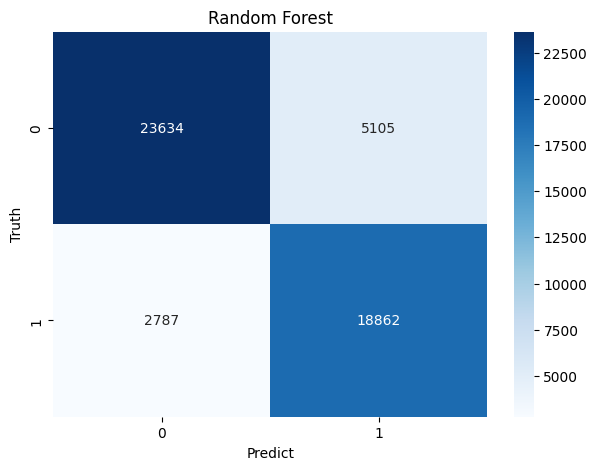

Random Forest :
[[23634  5105]
 [ 2787 18862]]
Accuracy Score:  0.8433754068428991

K-Fold Validation Mean Accuracy: 84.05 %

Standard Deviation: 0.21 %

ROC AUC Score: 0.85 %

Precision: 0.79 %

Recall: 0.87 %

F1 Score: 0.83 %

Cohen Score: 0.68 %

Execution Time: 293.72 seconds
----------------------------------------



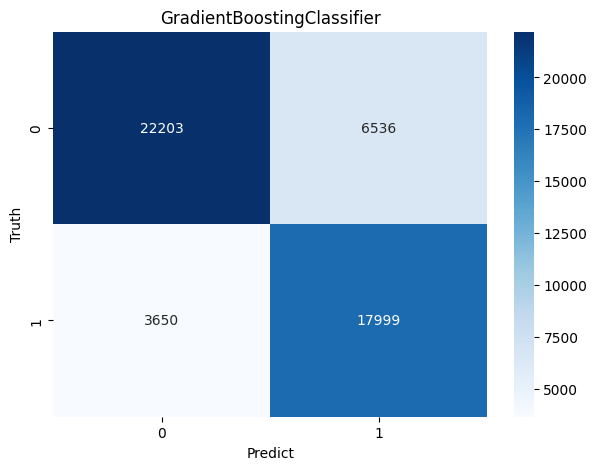

GradientBoostingClassifier :
[[22203  6536]
 [ 3650 17999]]
Accuracy Score:  0.7978486941335239

K-Fold Validation Mean Accuracy: 80.06 %

Standard Deviation: 0.24 %

ROC AUC Score: 0.80 %

Precision: 0.73 %

Recall: 0.83 %

F1 Score: 0.78 %

Cohen Score: 0.59 %

Execution Time: 170.50 seconds
----------------------------------------



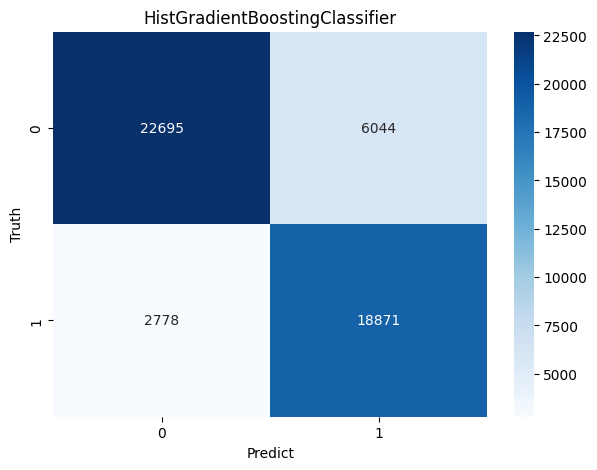

HistGradientBoostingClassifier :
[[22695  6044]
 [ 2778 18871]]
Accuracy Score:  0.8249186314201794

K-Fold Validation Mean Accuracy: 82.37 %

Standard Deviation: 0.28 %

ROC AUC Score: 0.83 %

Precision: 0.76 %

Recall: 0.87 %

F1 Score: 0.81 %

Cohen Score: 0.65 %

Execution Time: 14.99 seconds
----------------------------------------



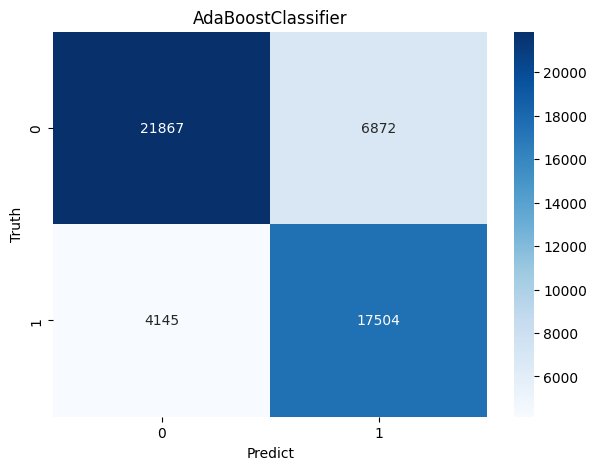

AdaBoostClassifier :
[[21867  6872]
 [ 4145 17504]]
Accuracy Score:  0.7813566722235453

K-Fold Validation Mean Accuracy: 78.35 %

Standard Deviation: 0.41 %

ROC AUC Score: 0.78 %

Precision: 0.72 %

Recall: 0.81 %

F1 Score: 0.76 %

Cohen Score: 0.56 %

Execution Time: 43.36 seconds
----------------------------------------



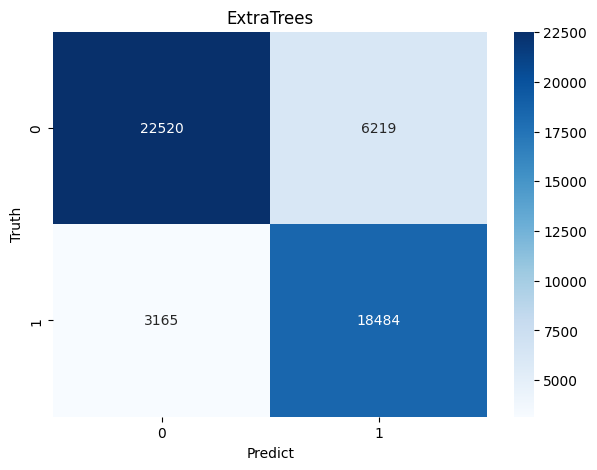

ExtraTrees :
[[22520  6219]
 [ 3165 18484]]
Accuracy Score:  0.8137651821862348

K-Fold Validation Mean Accuracy: 81.02 %

Standard Deviation: 0.22 %

ROC AUC Score: 0.82 %

Precision: 0.75 %

Recall: 0.85 %

F1 Score: 0.80 %

Cohen Score: 0.63 %

Execution Time: 104.90 seconds
----------------------------------------



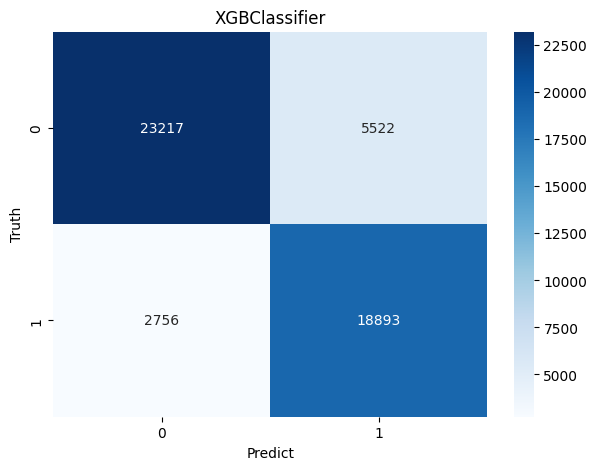

XGBClassifier :
[[23217  5522]
 [ 2756 18893]]
Accuracy Score:  0.8357148527427165

K-Fold Validation Mean Accuracy: 83.42 %

Standard Deviation: 0.18 %

ROC AUC Score: 0.84 %

Precision: 0.77 %

Recall: 0.87 %

F1 Score: 0.82 %

Cohen Score: 0.67 %

Execution Time: 9.50 seconds
----------------------------------------

[LightGBM] [Info] Number of positive: 65163, number of negative: 85998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 151161, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431083 -> initscore=-0.277432
[LightGBM] [Info] Start training from score -0.277432


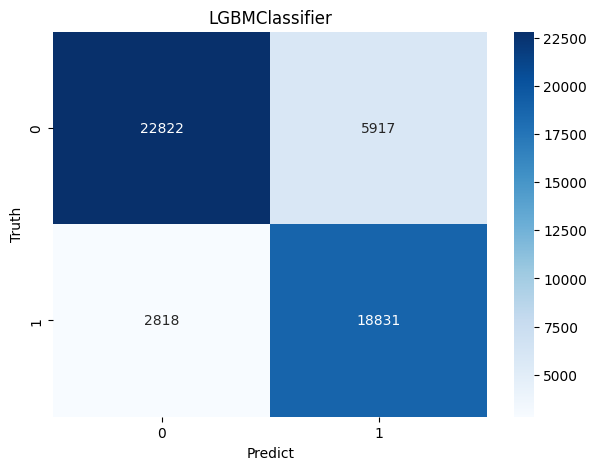

[LightGBM] [Info] Number of positive: 52130, number of negative: 68798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 120928, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431083 -> initscore=-0.277434
[LightGBM] [Info] Start training from score -0.277434
[LightGBM] [Info] Number of positive: 52130, number of negative: 68799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 120929, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431079 -> initscore=-0.277449
[LightGBM] [Info] Start training from score -0.277449
[LightGBM] [

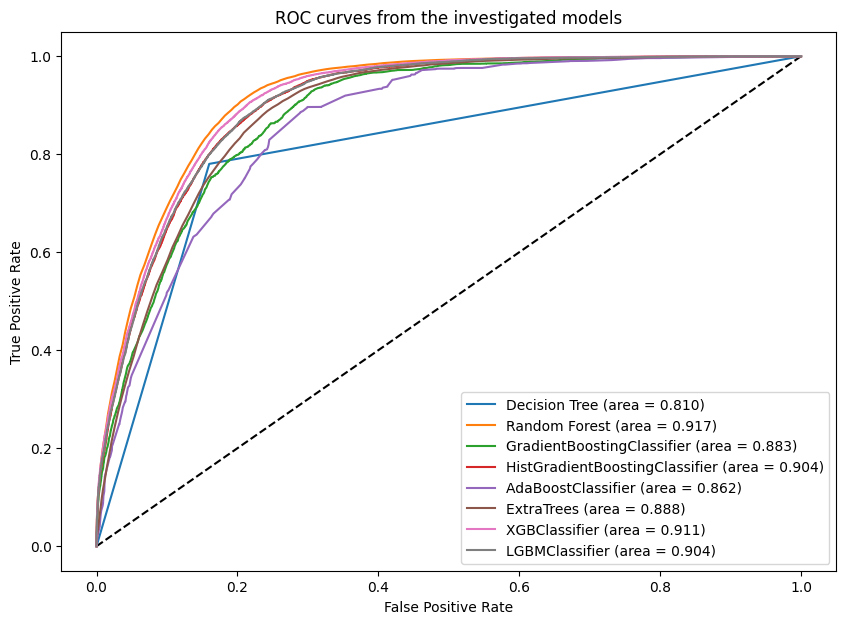

In [16]:
#generating confusion matrices and results of performance metrices of the models used

test_results = run_model(X_train, y_train, X_test, y_test, models, 5)

In [17]:
test_results

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score,Cohen-Kappa Score,Execution Time
1,Random Forest,84.337541,84.050118,0.212030,0.846816,0.786999,0.871264,0.826991,0.684589,293.719559
6,XGBClassifier,83.571485,83.422310,0.175003,0.840277,0.773828,0.872696,0.820294,0.669994,9.499396
7,LGBMClassifier,82.664523,82.514667,0.280327,0.831972,0.760910,0.869832,0.811734,0.652425,8.960755
3,HistGradientBoostingClassifier,82.491863,82.370452,0.277696,0.830687,0.757415,0.871680,0.810540,0.649291,14.988006
0,Decision Tree,81.434072,81.169745,0.161111,0.810138,0.786040,0.780267,0.783143,0.620838,8.901664
5,ExtraTrees,81.376518,81.022219,0.217362,0.818704,0.748249,0.853804,0.797549,0.626506,104.895421
2,GradientBoostingClassifier,79.784869,80.055700,0.239719,0.801987,0.733605,0.831401,0.779447,0.594204,170.499902
4,AdaBoostClassifier,78.135667,78.348246,0.411890,0.784709,0.718083,0.808536,0.760630,0.560706,43.357735
